# Soccer Players K-Means Clustering Project

## Introduction

One of the most popular unsupervised learning algorithms, K-Means Clustering is a quintessential model that all Machine Learning Engineers should have under their belt. 

With the amount of data that is available to us today, being able to identify patterns (or in this case clusters) is extremely valuable. 

We will be applying this model to FIFA players. Specifically, the data we will be working with will be for players in the EA Sports FIFA videogame. 

### FIFA Player Data Preprocessing

As mentioned in the introduction, we will be working with a player dataset from the FIFA 22 videogame. We will cluster based upon 5 features from our dataset: a player's overall rating, potential, value, wage, and age.

In [1]:
# We first import our necessary packages for data harvesting
import pandas as pd
import numpy as np

In [2]:
# We then read in our dataset, which can be found in my corresponding repo
players = pd.read_csv("players_22.csv")

C:\Users\danny\AppData\Local\Temp\ipykernel_7780\1596347291.py:2: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  players = pd.read_csv("players_22.csv")


In [3]:
# Let's then get an idea of what our dataset lookslike
players.head(10)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
5,200389,https://sofifa.com/player/200389/jan-oblak/220002,J. Oblak,Jan Oblak,GK,91,93,112000000.0,130000.0,28,...,33+3,33+3,33+3,32+3,89+3,https://cdn.sofifa.net/players/200/389/22_120.png,https://cdn.sofifa.net/teams/240/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/si.png
6,231747,https://sofifa.com/player/231747/kylian-mbappe...,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,95,194000000.0,230000.0,22,...,54+3,54+3,54+3,63+3,18+3,https://cdn.sofifa.net/players/231/747/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1335/60.png,https://cdn.sofifa.net/flags/fr.png
7,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Peter Neuer,GK,90,90,13500000.0,86000.0,35,...,34+3,34+3,34+3,35+3,88+2,https://cdn.sofifa.net/players/167/495/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
8,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,90,92,99000000.0,250000.0,29,...,33+3,33+3,33+3,31+3,88+3,https://cdn.sofifa.net/players/192/448/22_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/de.png
9,202126,https://sofifa.com/player/202126/harry-kane/22...,H. Kane,Harry Kane,ST,90,90,129500000.0,240000.0,27,...,61+3,61+3,61+3,64+3,20+3,https://cdn.sofifa.net/players/202/126/22_120.png,https://cdn.sofifa.net/teams/18/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1318/60.png,https://cdn.sofifa.net/flags/gb-eng.png


In [4]:
# We then define the features of our model
features = ["overall", "potential", "wage_eur", "value_eur", "age"]

In [5]:
# We then drop na values in these columns to allow them to be clustered
players = players.dropna(subset=features)

In [6]:
# We then define our feature matrix
matrix = players[features].copy()

### Model Construction Workflow

We then define what the workflow for our model construction will be
1. Scale the data
2. Initialize random centroids
3. Label each data point
4. Update our centroids
5. Repeat steps 3 and 4 until centroids stop changing (converges)

In [7]:
# Following our workflow, we scale our data using min/max scaling
matrix = ((matrix - matrix.min()) / (matrix.max() - matrix.min())) * 9 + 1

In [8]:
# Let's make sure our scaling worked (min should be 1, max should be 10)
matrix.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,4.670472,5.319998,1.219443,1.131826,4.063345
std,1.346635,1.191076,0.501528,0.353229,1.575838
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.739130,4.521739,1.012876,1.021620,2.666667
50%,4.717391,5.304348,1.064378,1.044817,4.000000
75%,5.500000,6.086957,1.193133,1.092370,5.333333
max,10.000000,10.000000,10.000000,10.000000,10.000000


In [9]:
# Let's see what the top players look like
matrix.head()

,overall,potential,wage_eur,value_eur,age
0,10.000000,9.608696,9.227468,4.618307,7.000000
1,9.804348,9.413043,7.939914,6.543654,6.333333
2,9.608696,9.217391,7.939914,3.087308,7.666667
3,9.608696,9.217391,7.939914,6.984396,5.333333
4,9.608696,9.217391,10.000000,6.822018,5.666667


In [10]:
# We then proceed to step 2: initialize random centroids
def random_centroids(maxtrix, k):
    centroids = []  # Create an empty list to store centroids
    for i in range(k):  # Iterate over the number of centroids specified
        centroid = matrix.apply(lambda x: float(x.sample()))  # Selects a random value from each column and convert it to a float
        centroids.append(centroid)  # Add our centroid to our list
    # Recall that the centroids stored are a 5-dimensional series
    return pd.concat(centroids, axis=1)  # Combines all individual series into df

In [11]:
centroids = random_centroids(matrix, 5)

In [12]:
# Let's take a look at our random centroids
centroids

,0,1,2,3,4
overall,4.913043,3.934783,1.978261,4.913043,3.152174
potential,5.500000,4.913043,6.478261,4.521739,4.717391
wage_eur,1.141631,1.141631,1.000000,1.502146,1.006438
value_eur,1.092370,1.019300,1.004686,1.043657,1.039017
age,4.666667,5.333333,6.666667,4.000000,6.333333


In [13]:
# We now proceed to step 3: Label each datapoint according to random centroids
# We will create a function that finds the distance between each datapoint and each centroid
def get_labels(matrix, centroids):
    # Calculate the distance between each datapoint and our randomized clusters
    distances = centroids.apply(lambda x: np.sqrt(((matrix - x)**2).sum(axis=1)))
    # We now want to identify which cluster each data point is in
    return distances.idxmin(axis=1) 

In [14]:
labels = get_labels(matrix, centroids)

In [15]:
# Let's make sure our function worked
labels.value_counts()

0    8418
3    7149
1    2543
4    1055
dtype: int64

In [16]:
# We now proceed to step 4: Updating our centroids. We do this by finding the geometric mean of the points
def new_centroids(matrix, labels, k): # We create a function to update our centroids
    return matrix.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T  # Calculate the geometric mean to each of our labels

### Visualization 

While not necessary, we will implement a data visualization function that will be able to visually represent the changes our clusters are making while they are updated in step 5 of our workflow.

In [17]:
# Import the required packages
from sklearn.decomposition import PCA # Recall our data is in 5D. Will summarize into 2D
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [18]:
# We then define our function to plot our clusters
def plot_clusters(matrix, labels, centroids, iteration):
    pca = PCA(n_components=2)  # Summarizes data into 2D
    matrix_2d = pca.fit_transform(matrix)  # Runs the above model
    centroids_2d = pca.transform(centroids.T)  # Same idea, only transposed
    clear_output(wait=True)  # Clear out graph to display new one
    plt.title(f"Iteration {iteration}")
    plt.scatter(x=matrix_2d[:,0], y=matrix_2d[:,1], c=labels)  # Plot as a scatter plot the results returned by PCA, using the labels for our color scheme
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1]) # Plots centroids over our graph
    plt.show()

### Model Implementation

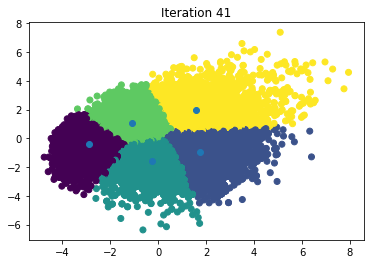

In [19]:
max_iterations = 100  # Number of times algorithm will itertate
k = 5  # Number of clusters

# We now implement the meat and potatoes of our model using functions from earlier
centroids = random_centroids(matrix, k)
old_centroids = pd.DataFrame()  # This will allow us to stop our model early if the clusters stop shifting
iteration = 1  # Initialize first iteration
  
while iteration < max_iterations and not centroids.equals(old_centroids):    # While our iteration number is under our limit set earlier and clusters aren't equal
    old_centroids = centroids # For the next iteration, the centroids from this iteration are old
    labels = get_labels(matrix, centroids)  # Create our clusters by analyzing each data point
    centroids = new_centroids(matrix, labels, k)  # Update our clusters
    plot_clusters(matrix, labels, centroids, iteration)  # Visualize our changes
    iteration += 1  # Increment our iteration count by 1

### Interpretations

Recall that for unsupervised machine learning algorithms, the data is unlabeled from the beginning. Hence, there is technically no right/wrong answer for the results we achieve as long as our model followed the correct workflow and our math checks out. Thus, this next section will be dedicated to interpreting our results.

In [20]:
# Let's see what our centroids look like
centroids

,0,1,2,3,4
overall,2.521264,5.466410,4.075327,4.325994,6.518459
potential,4.430371,5.121912,3.989831,5.872830,6.894018
wage_eur,1.016237,1.208720,1.046160,1.073831,1.716649
value_eur,1.013545,1.073446,1.026643,1.062588,1.488272
age,2.309197,5.883802,4.713610,2.689417,3.932369


In [28]:
# Which players are cluster 1 referring to? (star players)
players[labels == 4][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
0,L. Messi,93,93,320000.0,78000000.0,34
1,R. Lewandowski,92,92,270000.0,119500000.0,32
2,Cristiano Ronaldo,91,91,270000.0,45000000.0,36
3,Neymar Jr,91,91,270000.0,129000000.0,29
4,K. De Bruyne,91,91,350000.0,125500000.0,30
...,...,...,...,...,...,...
6230,C. Gutiérrez,69,81,6000.0,3400000.0,22
6254,Iñaki Peña,69,80,29000.0,2700000.0,22
6265,Jaume Grau,69,78,10000.0,2900000.0,24
6309,Patrick William,69,77,4000.0,2900000.0,24


In [22]:
# How about the young players (cluster 0)?
players[labels == 0][["short_name"] + features]

,short_name,overall,potential,wage_eur,value_eur,age
11593,Raphael Doninho,64,64,5000.0,700000.0,21
12250,D. Ferdiz,63,63,500.0,500000.0,21
13640,Dêniro Prestes,62,62,2000.0,475000.0,21
13641,Raullino Meneses,62,62,2000.0,425000.0,21
14368,Jája Silva,62,66,2000.0,575000.0,22
...,...,...,...,...,...,...
19234,Song Defu,47,52,1000.0,70000.0,22
19235,C. Porter,47,59,500.0,110000.0,19
19236,N. Logue,47,55,500.0,100000.0,21
19237,L. Rudden,47,60,500.0,110000.0,19


In [23]:
# Let's compare our model to what's in scikitlearn
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(5)
kmeans.fit(matrix)

KMeans(n_clusters=5)

In [25]:
centroids2 = kmeans.cluster_centers_

In [26]:
pd.DataFrame(centroids2, columns=features).T

,0,1,2,3,4
overall,4.949566,4.271904,3.008004,5.781324,7.143713
potential,6.109375,4.078570,4.841406,5.424762,7.362536
wage_eur,1.152534,1.053400,1.021768,1.299639,2.342176
value_eur,1.097601,1.027634,1.019466,1.099020,1.966601
age,3.136741,5.132916,2.477996,6.008936,4.299623


In [27]:
# Remind ourselves of what we arrived at
centroids

,0,1,2,3,4
overall,2.521264,5.466410,4.075327,4.325994,6.518459
potential,4.430371,5.121912,3.989831,5.872830,6.894018
wage_eur,1.016237,1.208720,1.046160,1.073831,1.716649
value_eur,1.013545,1.073446,1.026643,1.062588,1.488272
age,2.309197,5.883802,4.713610,2.689417,3.932369


## Conclusion

For the most part, it looks like our model did a pretty good job. Our clusters that we created match closely with what scikit-learn came up with. As a result, we can be confident that our implementation is working correctly. 